In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tarfile
import os

sns.set_palette("Set2")

In [2]:
# import general_data
general_data = pd.read_csv('general_data.csv')
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [3]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [4]:
print(general_data['Over18'].value_counts())
print(general_data['EmployeeCount'].value_counts())
general_data['StandardHours'].value_counts()

Over18
Y    4410
Name: count, dtype: int64
EmployeeCount
1    4410
Name: count, dtype: int64


StandardHours
8    4410
Name: count, dtype: int64

In [5]:
# These three variables always have the same value, so you can delete them as they will have no impact.
general_data.drop(['Over18', 'StandardHours', 'EmployeeCount'], axis=1, inplace=True)

In [6]:
# Handling Missing Data
numerical_columns = general_data.select_dtypes(include=['float64','int64']).columns
general_data[numerical_columns] = general_data[numerical_columns].fillna(general_data[numerical_columns].median())

categorical_columns = general_data.select_dtypes(include=['object']).columns
general_data[categorical_columns] = general_data[categorical_columns].fillna(general_data[categorical_columns].mode().iloc[0])

general_data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

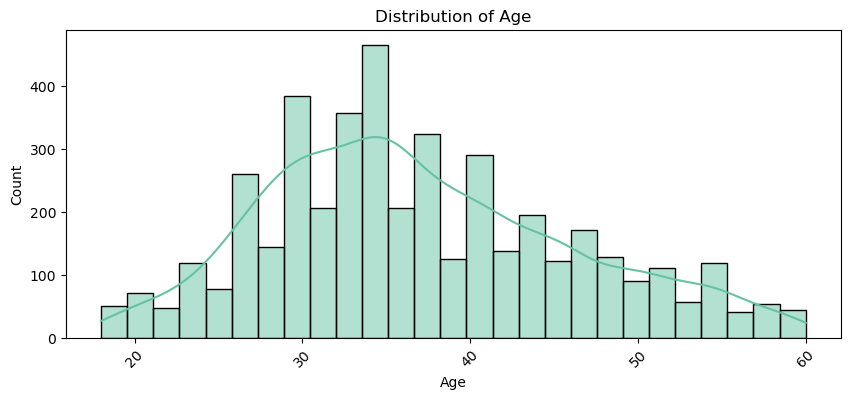

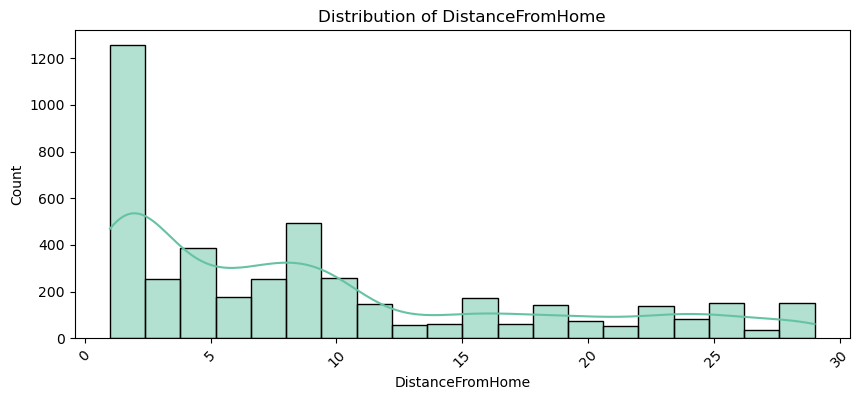

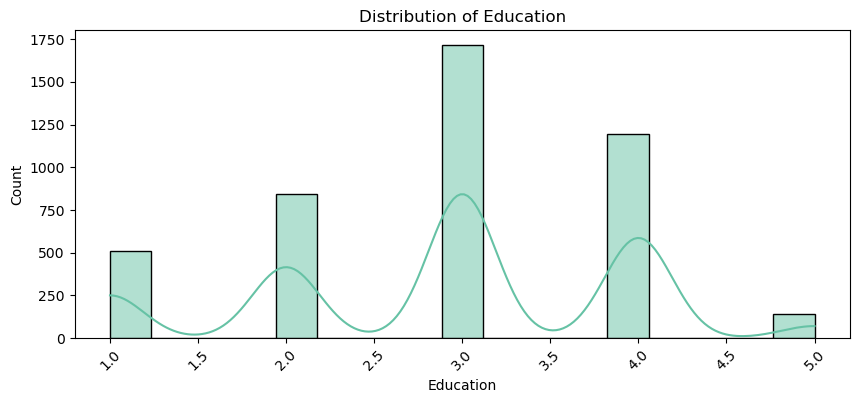

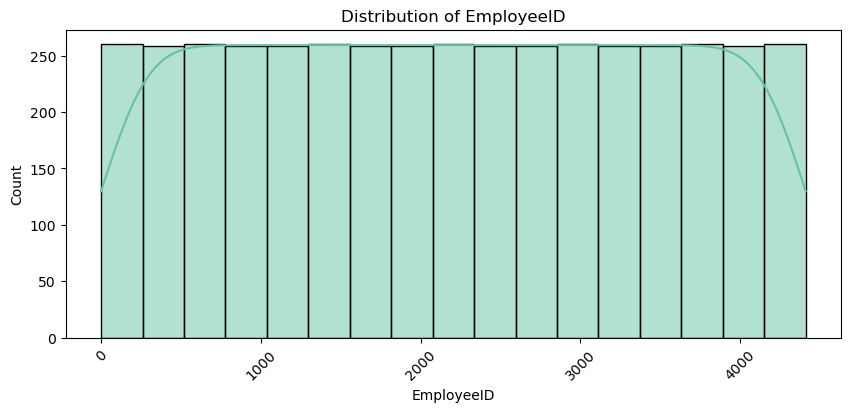

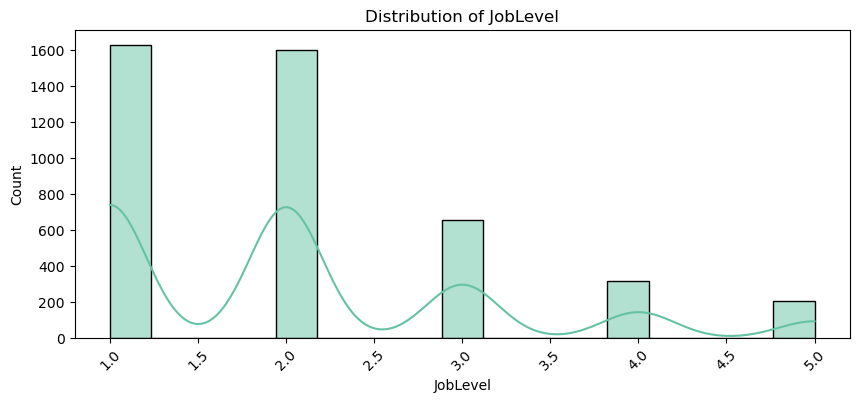

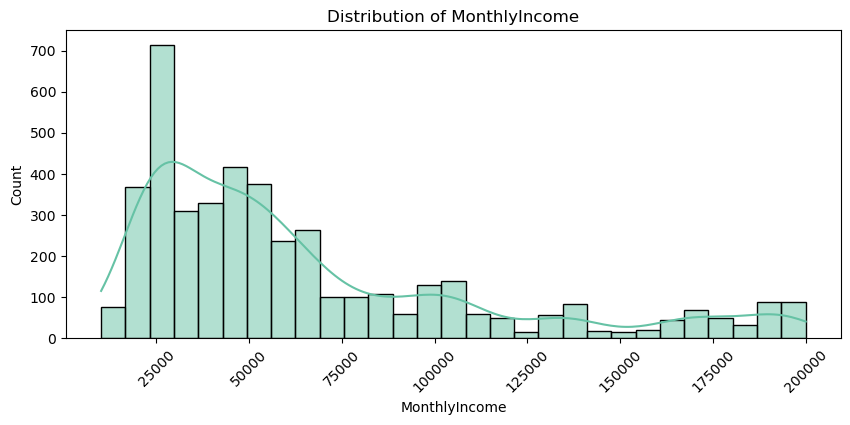

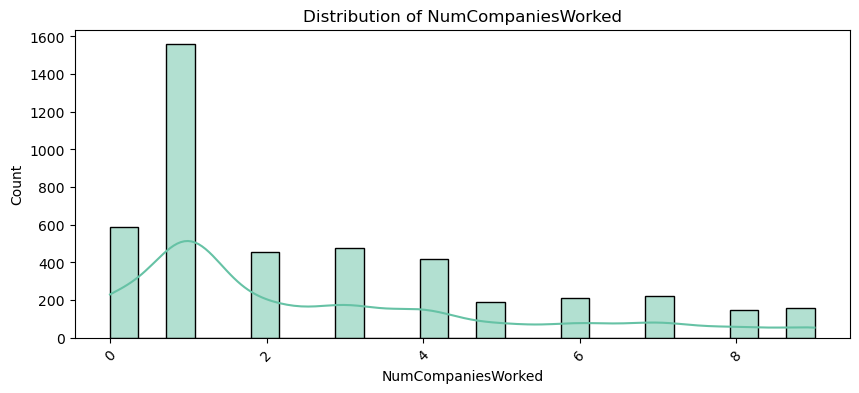

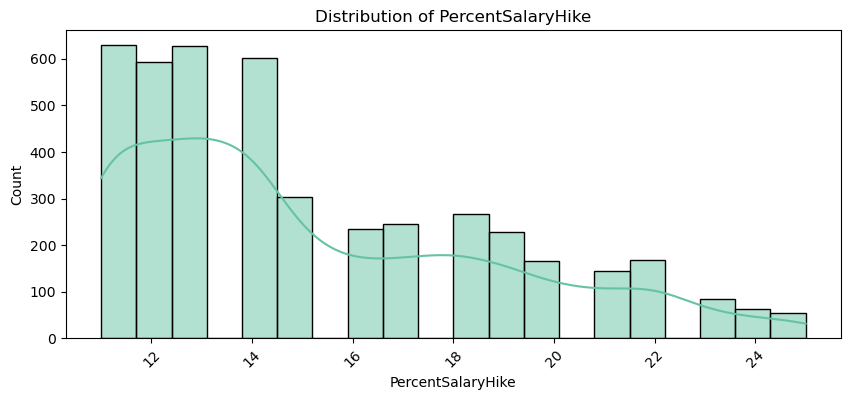

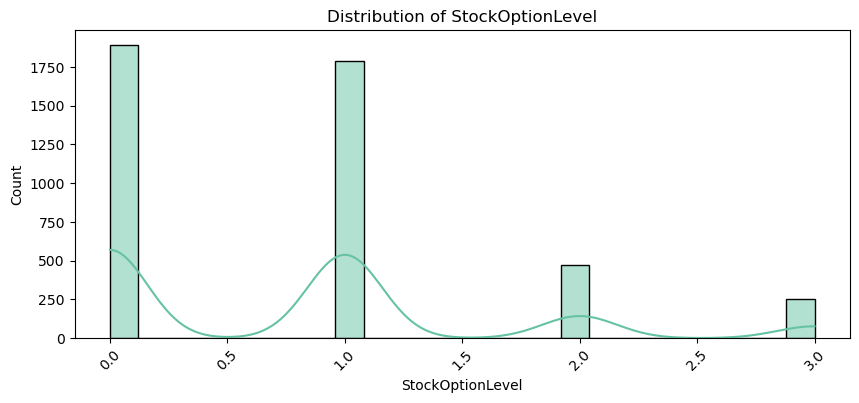

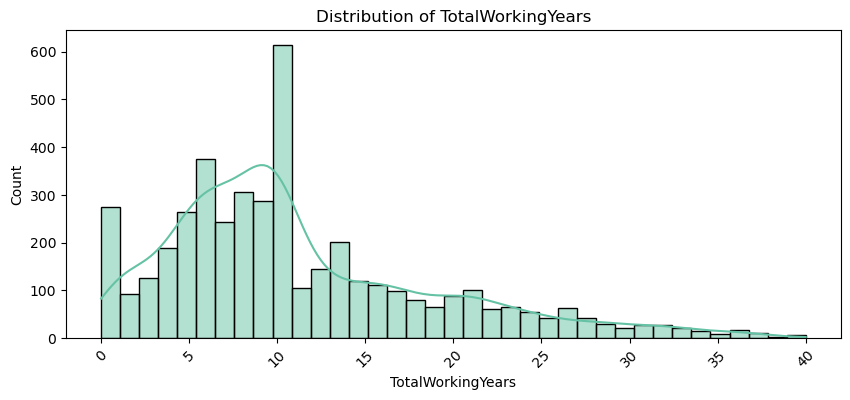

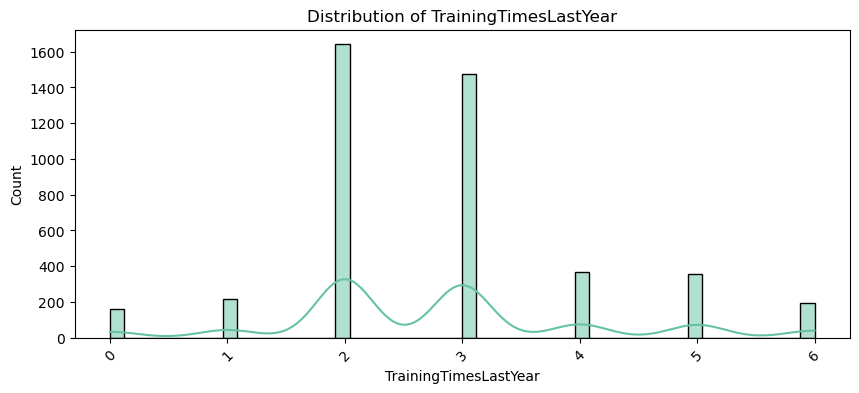

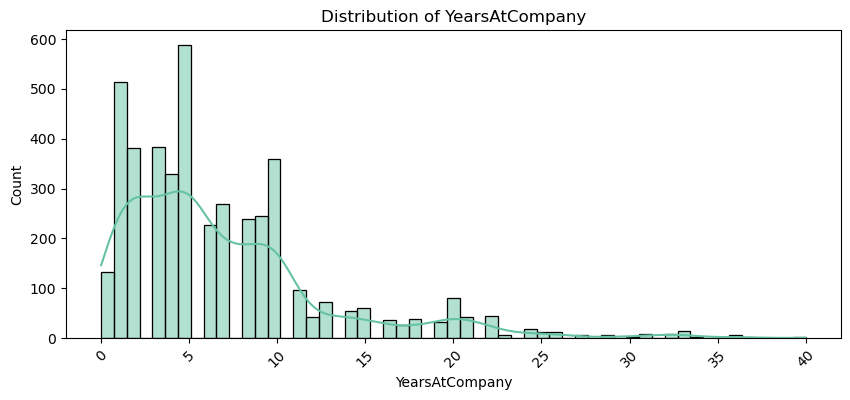

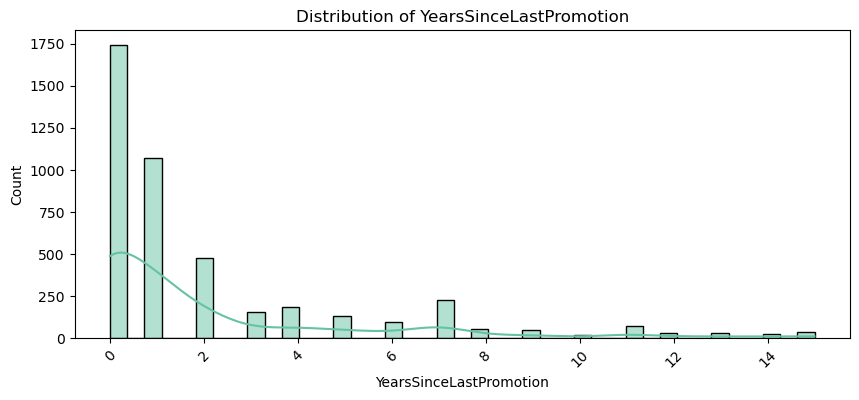

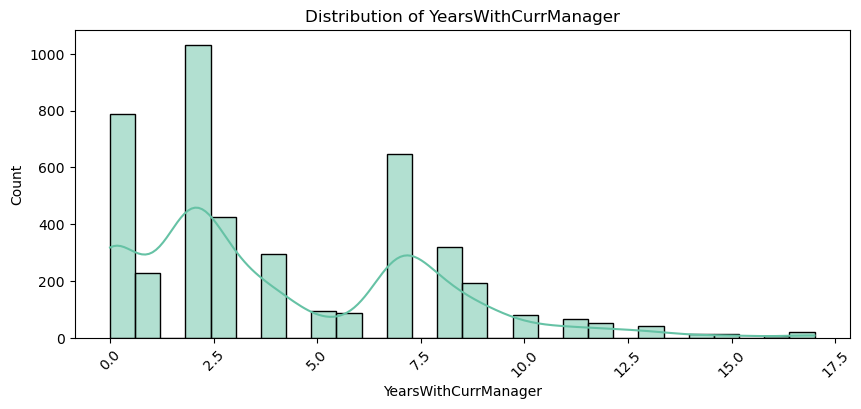

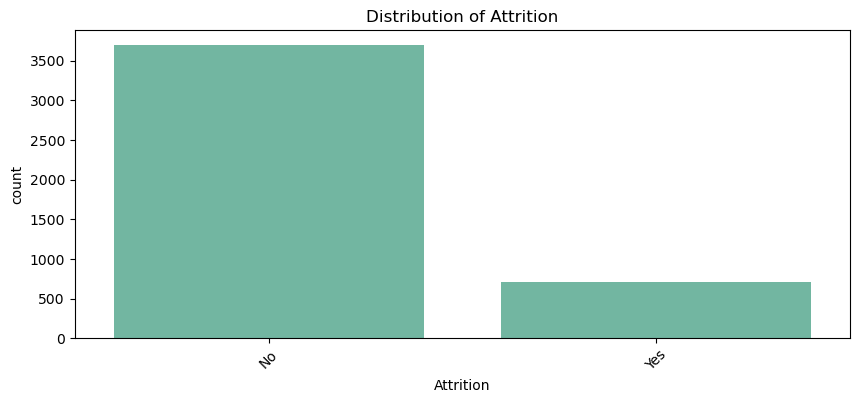

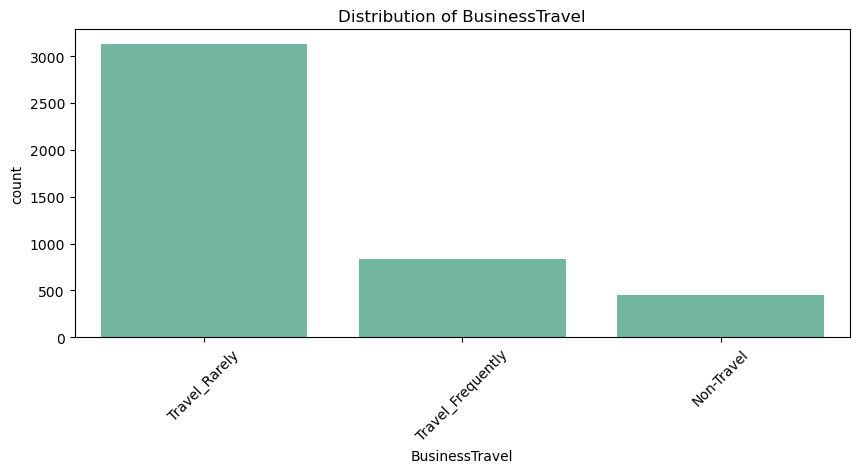

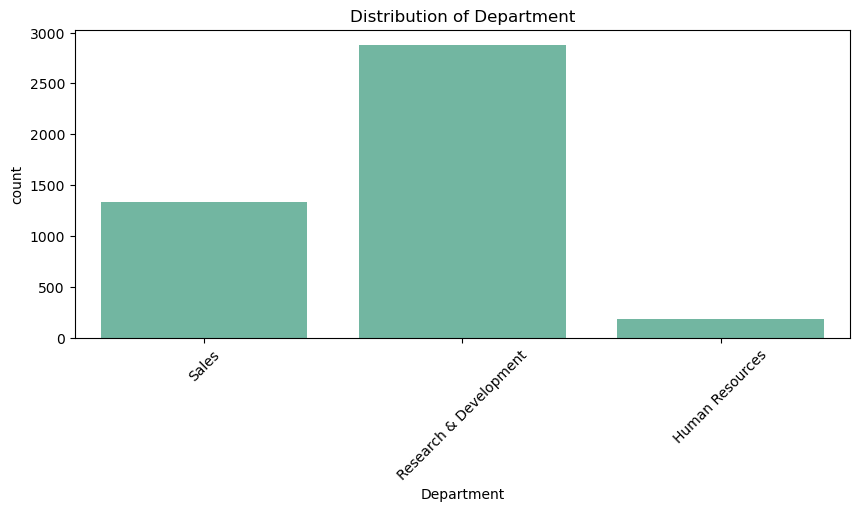

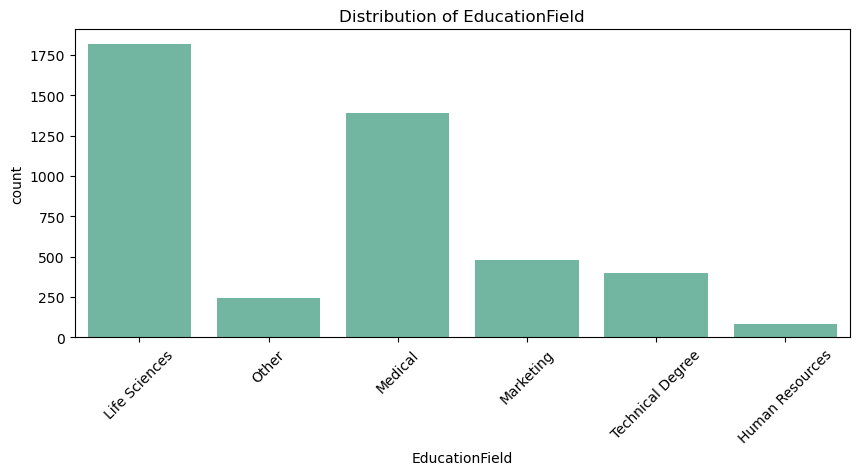

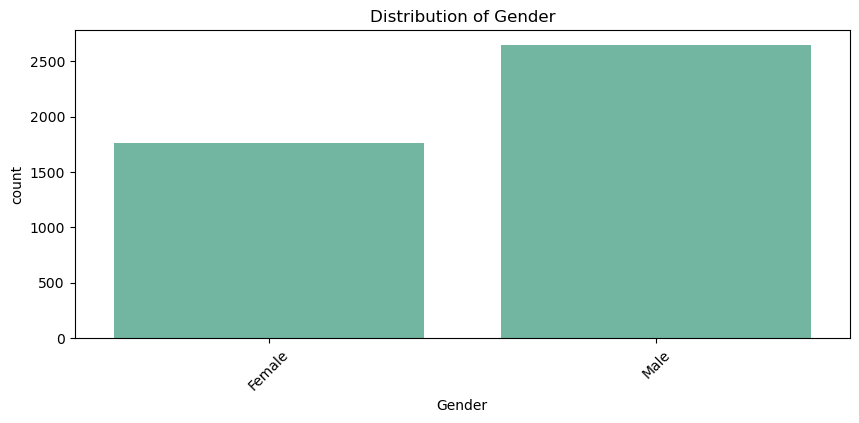

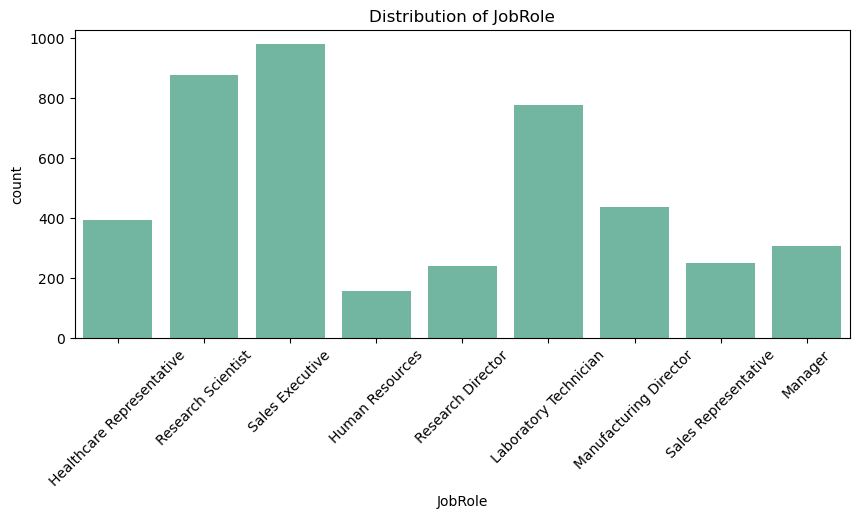

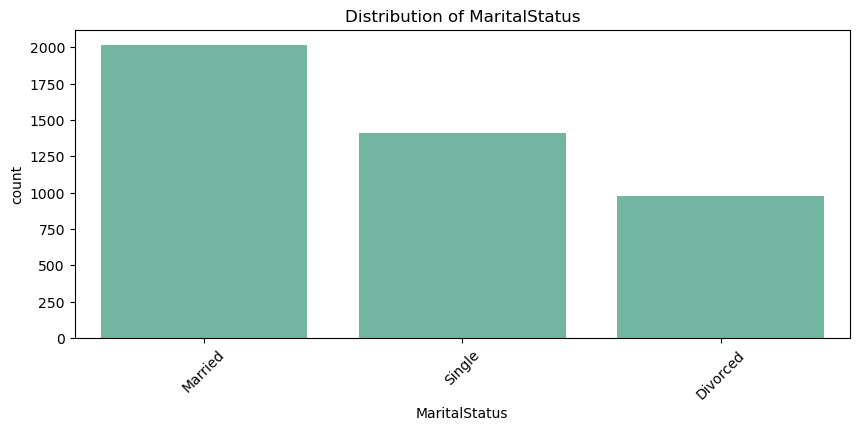

In [7]:
# Data Analysis for general data 

for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(general_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=general_data, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

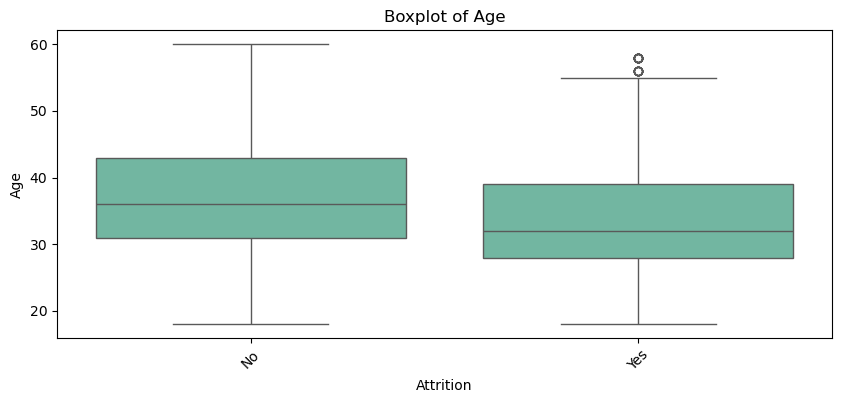

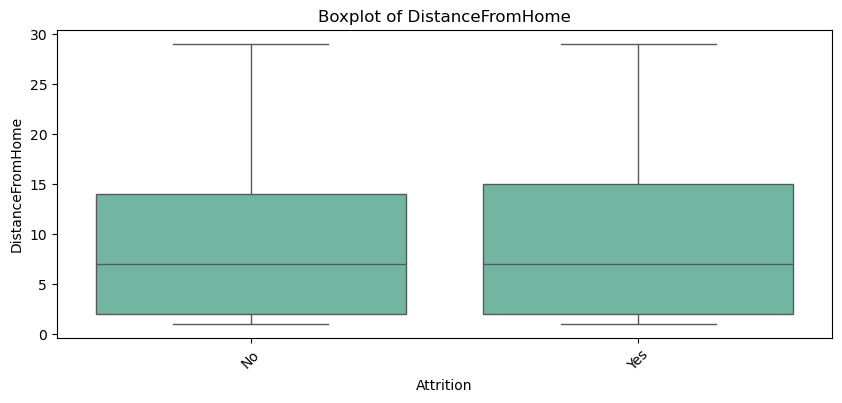

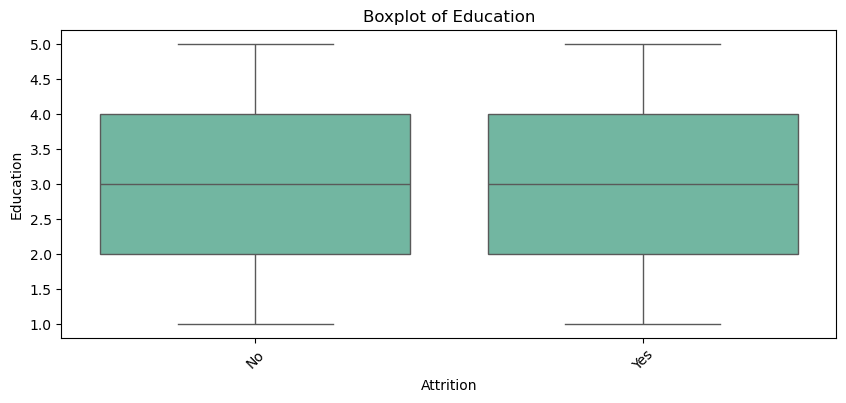

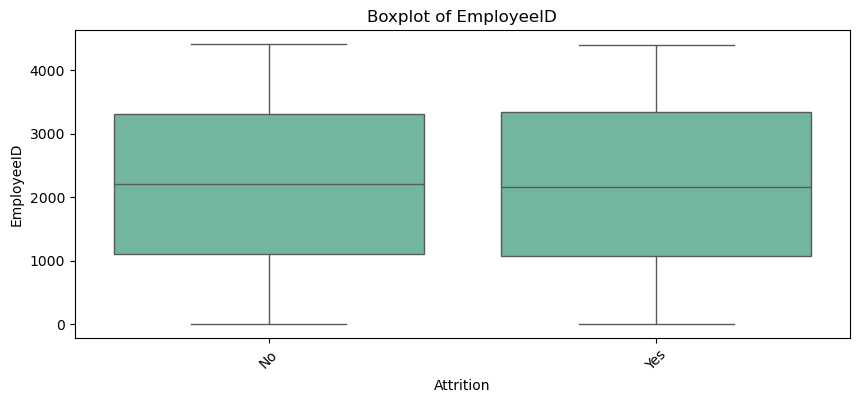

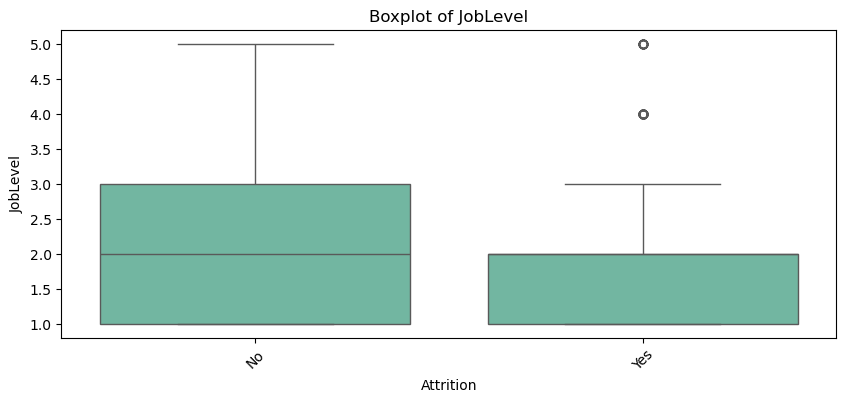

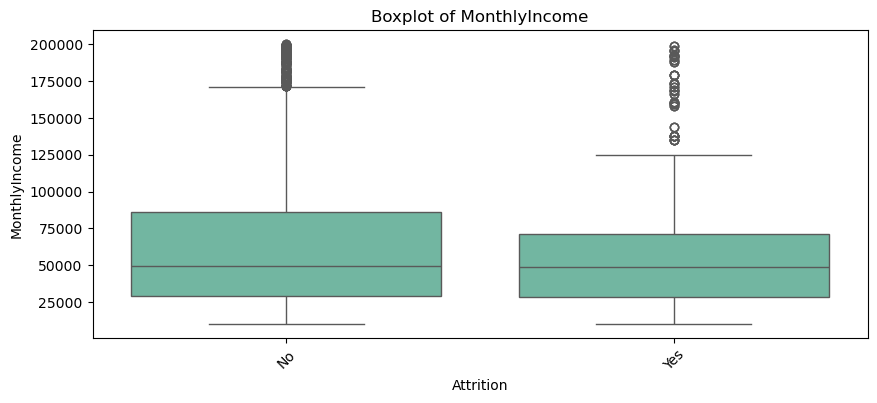

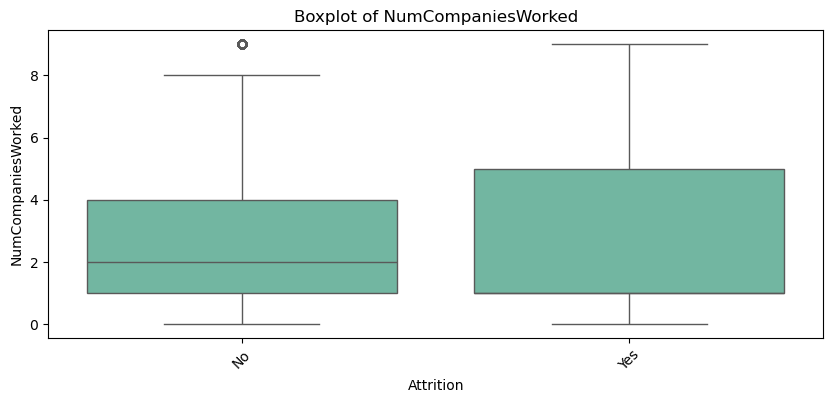

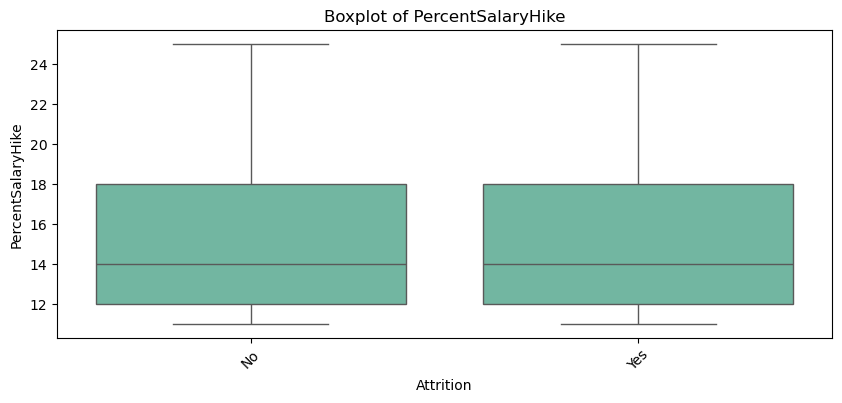

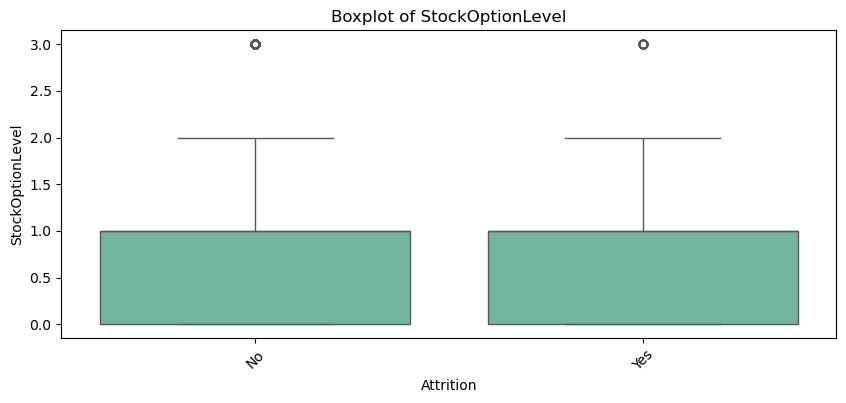

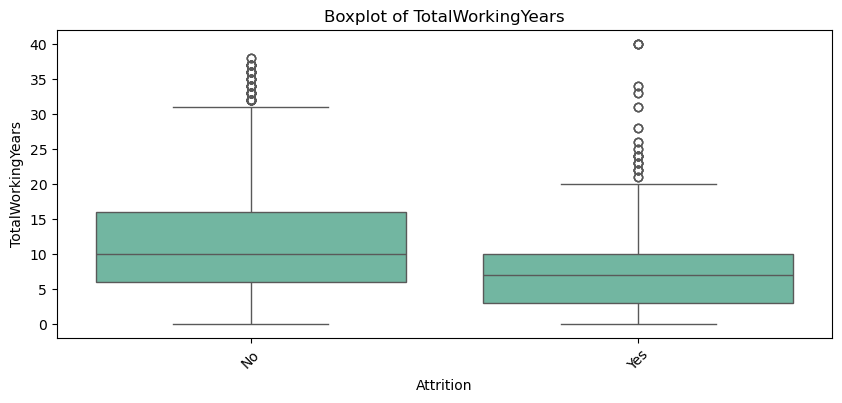

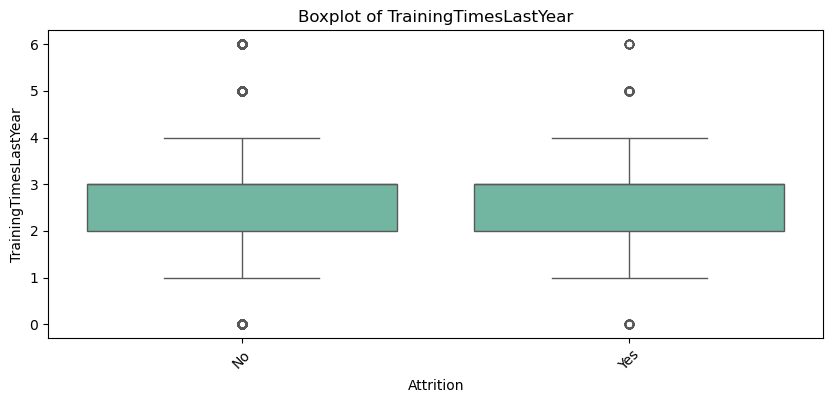

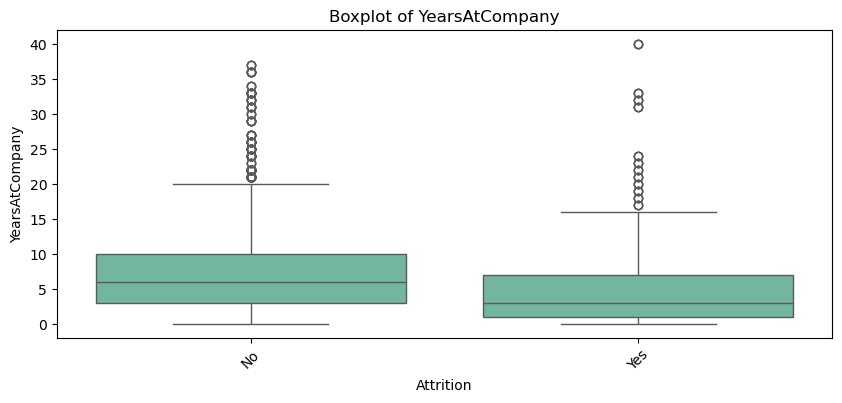

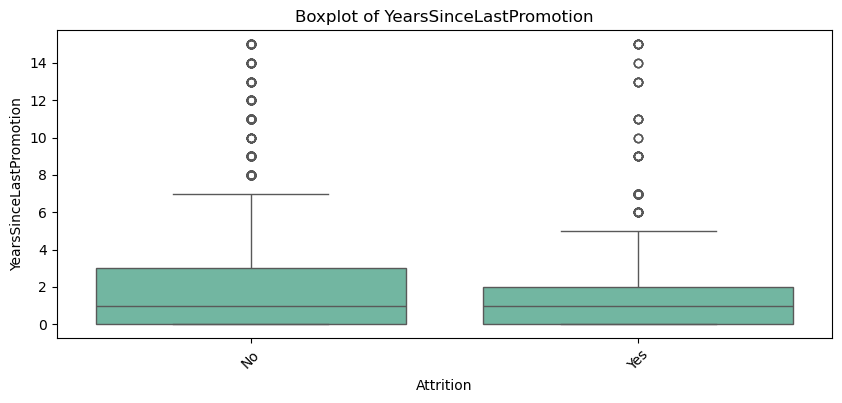

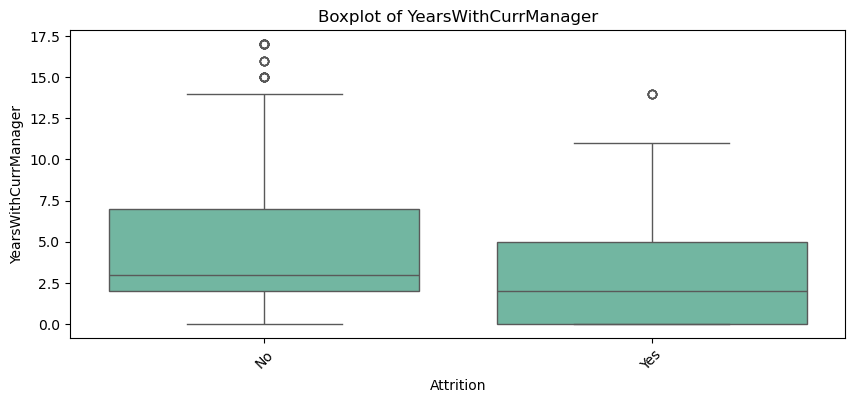

In [8]:
#box plot for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 4), )
    sns.boxplot(x=general_data["Attrition"], y=general_data[column])
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)
    plt.show()

In [9]:
#unique stock option level values
print(general_data['StockOptionLevel'].value_counts())

StockOptionLevel
0    1893
1    1788
2     474
3     255
Name: count, dtype: int64


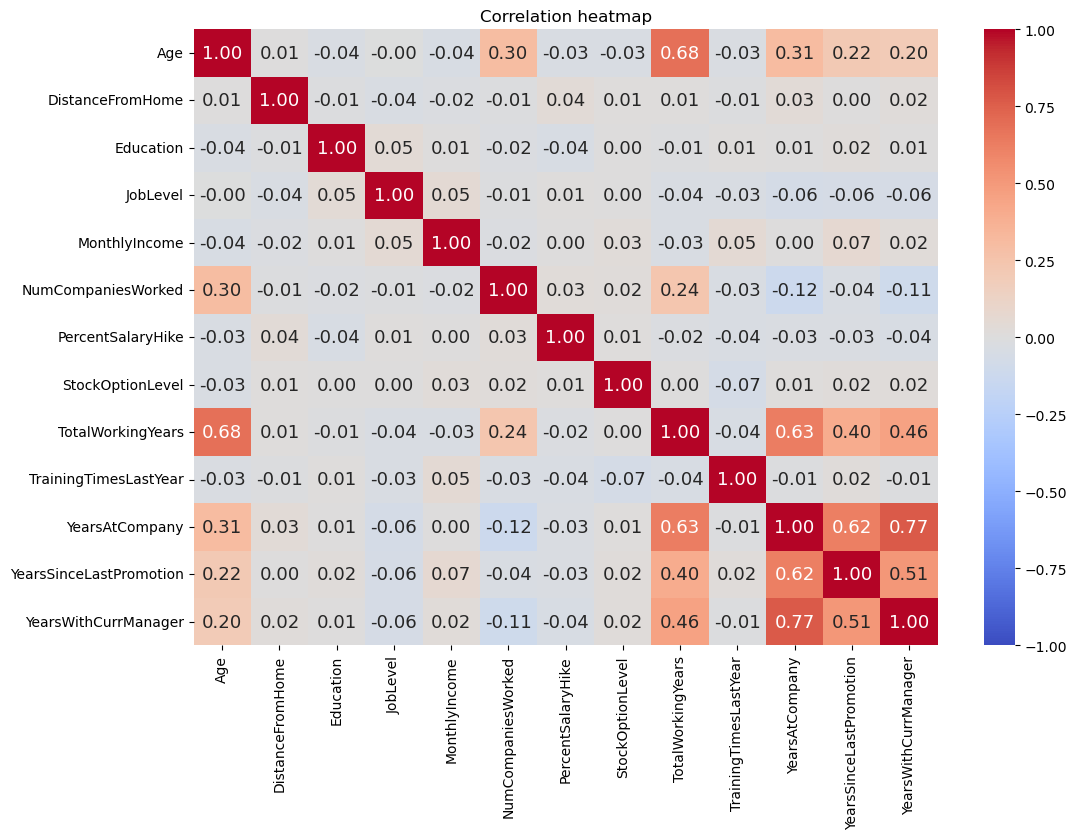

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    general_data[numerical_columns].drop('EmployeeID', axis=1).corr(),
    annot=True,
    annot_kws={'size': 13},
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.title('Correlation heatmap')
plt.show()


In [11]:
# Adding Data from Manager Survey Data File
# Manager survey data prep
manager_survey_data = pd.read_csv('manager_survey_data.csv')
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


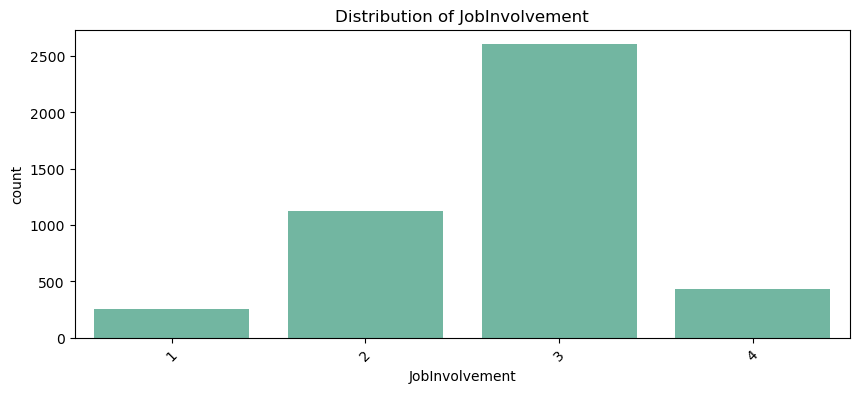

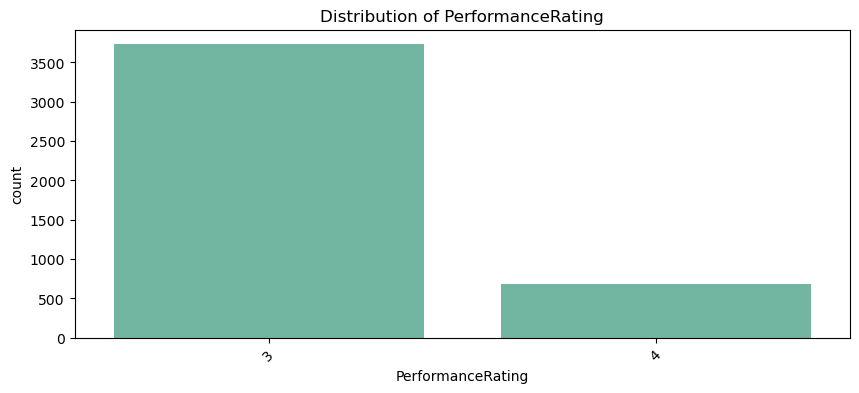

In [12]:
#Distributions of JobInvolvement, PerformanceRating
plt.figure(figsize=(10, 4))
sns.countplot(data=manager_survey_data, x='JobInvolvement')
plt.title('Distribution of JobInvolvement')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=manager_survey_data, x='PerformanceRating')
plt.title('Distribution of PerformanceRating')
plt.xticks(rotation=45)
plt.show()

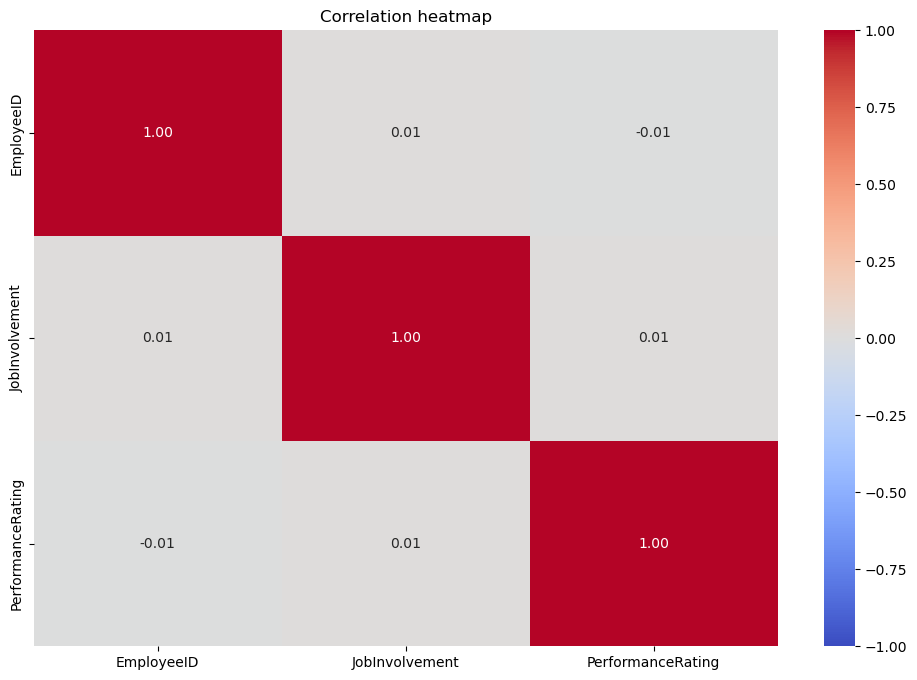

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    manager_survey_data.corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.title('Correlation heatmap')
plt.show()


In [14]:
manager_survey_data['PerformanceRating'].value_counts()

PerformanceRating
3    3732
4     678
Name: count, dtype: int64

In [15]:
# Merging the General Data, and Manager Survey Data based on EmployeeID

all_data = pd.merge(general_data, manager_survey_data, on='EmployeeID', how='inner')
print(all_data.shape)
all_data.head()

(4410, 23)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,11,0,1.0,6,1,0,0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,0.0,23,1,6.0,3,5,1,4,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,1.0,15,3,5.0,2,5,0,3,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,3.0,11,3,13.0,5,8,7,5,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,4.0,12,2,9.0,2,6,0,4,3,3


In [16]:
# Exploring Employee Survey Data

employee_survey_data = pd.read_csv('employee_survey_data.csv')
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [17]:
employee_survey_data = employee_survey_data.fillna(employee_survey_data.mode().iloc[0])
print(employee_survey_data.isnull().sum())
employee_survey_data.head()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


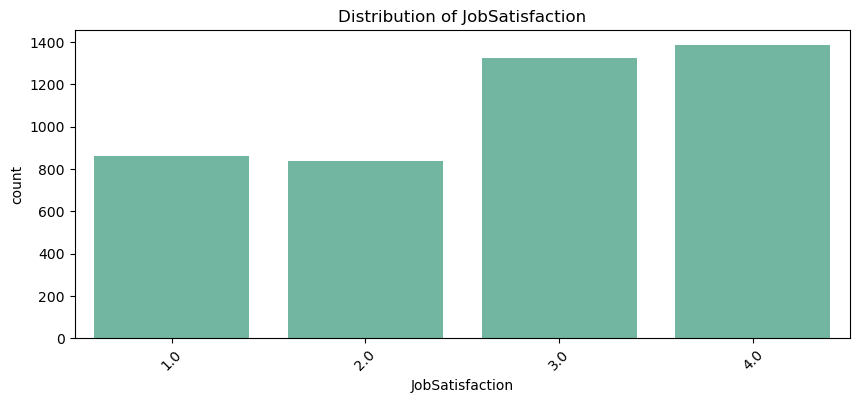

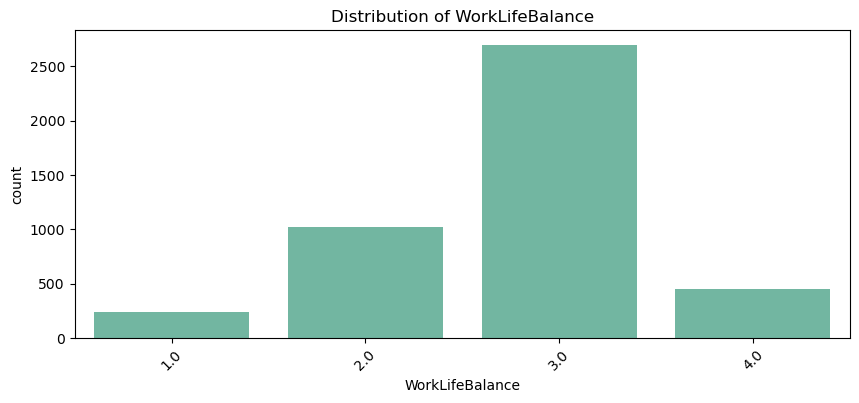

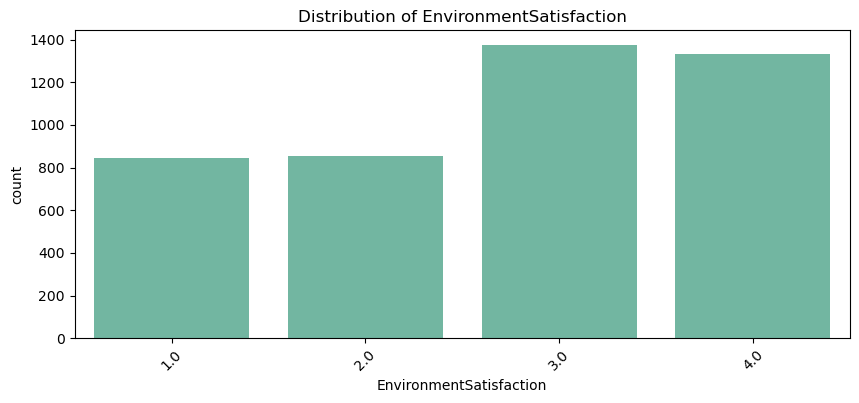

In [18]:
plt.figure(figsize=(10, 4))
sns.countplot(data=employee_survey_data, x='JobSatisfaction')
plt.title('Distribution of JobSatisfaction')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=employee_survey_data, x='WorkLifeBalance')
plt.title('Distribution of WorkLifeBalance')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=employee_survey_data, x='EnvironmentSatisfaction')
plt.title('Distribution of EnvironmentSatisfaction')
plt.xticks(rotation=45)
plt.show()

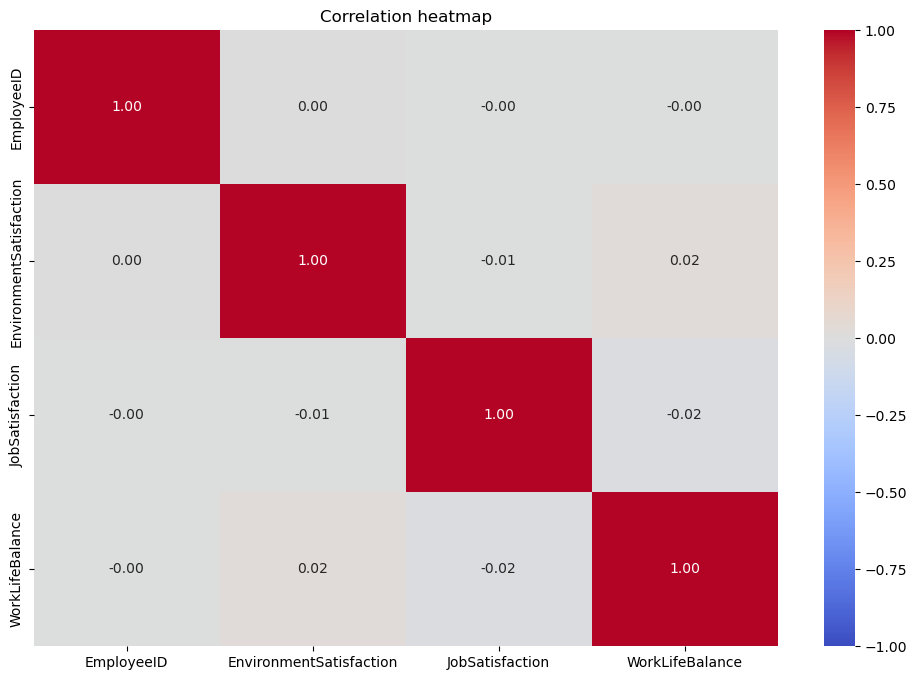

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    employee_survey_data.corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.title('Correlation heatmap')
plt.show()

In [20]:
# Merging all data together

all_data = pd.merge(all_data, employee_survey_data, on='EmployeeID', how='inner')
print(all_data.shape)
all_data.head()

(4410, 26)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


In [21]:
# Exporting all data to csv for model building!

all_data.to_csv('cleaned_all_data.csv', index=False)